# Author: Arslan Haider Khan 

# TASK 1: Prediction using Supervised ML

Problem Statement:Predict the percentage of a student based on the number of study hours and calculate the predicted score if a student studies for 9.25 hours/day.

Solution :For predicting the student's score based on the number of hours' studied, I have used Linear Regression.In this regression task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

Dataset  : https://bit.ly/3kXTdox


# Step 1: Reading and Understanding the Data

Let's start with the following steps:

1: Importing data using the pandas library
2: Understanding the structure of the data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Read data from the given url
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data= pd.read_csv(url)
print("Data loaded successfully!")
data.head()

Data loaded successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's inspect the various aspects of our dataframe

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.shape

(25, 2)

In [6]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2: Visualising the Data

Let's plot our data on a graph to look closely at the dataset given and try to find the relationship between the data.

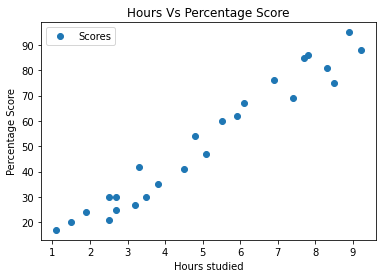

In [7]:
#Plot of Scores Distribution
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage Score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

Inference: From the above graph, we can infer that there is a positive linear relation between the number of study hours and Percentage Score.

# Step 3: Data Preprocessing

I first assign the feature variable, Hours, in this case, to the variable X and the response variable, Score, to the variable y.The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
# Data is divided into "attributes" and "labels"
X = data.iloc[:, :-1].values
y= data.iloc[:, 1].values

# Step 4: Training the Algorithm

After splitting the data into training and testing sets,finally it's the time to train our algorithm.

In [9]:
#Splitting of data into training and testing sets
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
regressor= LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)
print("Training Completed")


Training Completed


# Plotting the Line of Regression

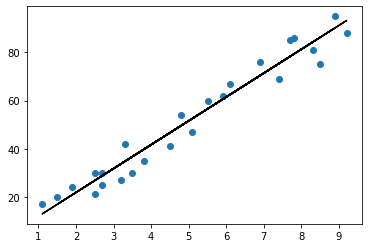

In [10]:
#Visualizing the best fit line of Regression.
line= regressor.coef_*X + regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line, color='black')
plt.show()

# Predicting the Data

Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [11]:

print(X_test) #Testing data
y_pred= regressor.predict(X_test) #Model predictions

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Step 5: Comparison of Actual result vs Predicted result

In [12]:
df = pd.DataFrame({'Actual Result': y_test, 'Predicted Result': y_pred})  
df

,Actual Result,Predicted Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step 6: Estimating Training & Test Score

In [13]:

# Training score
print("Training Score: ", regressor.score(X_train,y_train))
# Test Score
print("Test Score: ", regressor.score(X_test,y_test))

Training Score:  0.9515510725211552
Test Score:  0.9454906892105356


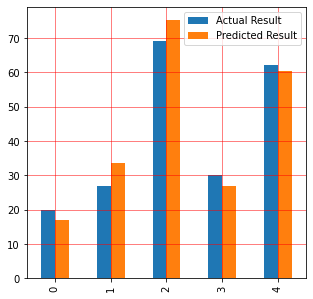

In [14]:
df.plot(kind='bar', figsize=(5,5))
plt.grid(linewidth='0.5', color='blue')
plt.grid(linewidth='0.5', color='red')

In [15]:


# Testing with own Data
Hours = 9.25
test= np.array([Hours]).reshape(-1,1)
prediction = regressor.predict(test)
print("Number Of Hours = {}".format(Hours))
print("Predicted Score= {}".format(prediction[0]))

Number Of Hours = 9.25
Predicted Score= 93.69173248737538


# Step 7 (Final Step): Evaluating the model

The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [16]:
# Let's calculate different errors to compare the model performance and predict accuracy.
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ", r2_score(y_test,y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
R2 score:  0.9454906892105356


# Conclusion:

After Analysing the dataset we got Predicted score around 93 based on the number of study hours i.e., 9.25 hrs/day.

Thank you :)